<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-выводы" data-toc-modified-id="Подготовка-данных-выводы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подготовка данных выводы</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-данных-выводы" data-toc-modified-id="Анализ-данных-выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ данных выводы</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Модель-выводы:" data-toc-modified-id="Модель-выводы:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель выводы:</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Подготовка-данных-выводы" data-toc-modified-id="Подготовка-данных-выводы-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Подготовка данных выводы</a></span></li><li><span><a href="#Анализ-данных-выводы" data-toc-modified-id="Анализ-данных-выводы-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Анализ данных выводы</a></span></li><li><span><a href="#Модель-выводы:" data-toc-modified-id="Модель-выводы:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Модель выводы:</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Цель работы:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.



## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, make_pipeline


from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV


from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

from numpy.random import RandomState

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.dummy import DummyRegressor


In [2]:
try:
    df_train=pd.read_csv('gold_industry_train.csv')
    df_test=pd.read_csv('gold_industry_test.csv')
    df_full=pd.read_csv('gold_industry_full.csv')
except:
    df_train=pd.read_csv('/datasets/gold_industry_train.csv')
    df_test=pd.read_csv('/datasets/gold_industry_test.csv')
    df_full=pd.read_csv('/datasets/gold_industry_full.csv')

In [3]:
df_list=[df_train, df_test, df_full]
df_names = ['df_train', 'df_test', 'df_full']

Технологический процесс

    Rougher feed — исходное сырье
    Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
    Xanthate — ксантогенат (промотер, или активатор флотации);
    Sulphate — сульфат (на данном производстве сульфид натрия);
    Depressant — депрессант (силикат натрия).
    Rougher process (англ. «грубый процесс») — флотация
    Rougher tails — отвальные хвосты
    Float banks — флотационная установка
    Cleaner process — очистка
    Rougher Au — черновой концентрат золота
    Final Au — финальный концентрат золота
    
Параметры этапов

    air amount — объём воздуха
    fluid levels — уровень жидкости
    feed size — размер гранул сырья
    feed rate — скорость подачи
    Наименование признаков
    Наименование признаков должно быть такое:
    [этап].[тип_параметра].[название_параметра]
    Пример: rougher.input.feed_ag
    Возможные значения для блока [этап]:
    rougher — флотация
    primary_cleaner — первичная очистка
    secondary_cleaner — вторичная очистка
    final — финальные характеристики
    Возможные значения для блока [тип_параметра]:
input — параметры сырья
    output — параметры продукта
    state — параметры, характеризующие текущее состояние этапа
    calculation — расчётные характеристики

In [4]:
pd.set_option('display.max_columns', None)


In [5]:
for idx, i in enumerate(df_list):
    print('')
    print(f'DataFrame {df_names[idx]}')
    display(i.head(5))
    print('')
    print(f'Информация о DataFrame {df_names[idx]}')
    print('')
    i.info()
    print('')
    print(f'Количестов пропусков в DataFrame {df_names[idx]}')
    print('')
    with pd.option_context('display.max_rows', None):print(i.isna().sum())
    print('')
    print(f'Количестов дубликатов в DataFrame {df_names[idx]}')
    print('')
    print(i.duplicated().sum())


DataFrame df_train


date  rougher.input.feed_au  rougher.input.feed_ag  \
0  2016-01-15 00:00:00               6.486150               6.100378   
1  2016-01-15 01:00:00               6.478583               6.161113   
2  2016-01-15 02:00:00               6.362222               6.116455   
3  2016-01-15 03:00:00               6.118189               6.043309   
4  2016-01-15 04:00:00               5.663707               6.060915   

   rougher.input.feed_pb  rougher.input.feed_sol  rougher.input.feed_rate  \
0               2.284912               36.808594               523.546326   
1               2.266033               35.753385               525.290581   
2               2.159622               35.971630               530.026610   
3               2.037807               36.862241               542.590390   
4               1.786875               34.347666               540.531893   

   rougher.input.feed_size  rougher.input.floatbank10_sulfate  \
0                55.486599                          11.986616   
1                57.278666                          11.971193   
2                57.510649                          11.920603   
3                57.792734                          11.630094   
4                56.047189                          10.957755   

   rougher.input.floatbank10_xanthate  rougher.state.floatbank10_a_air  \
0                            6.007990                       999.706909   
1                            6.005766                      1000.286398   
2                            6.197377                       999.719565   
3                            6.203177                       999.814770   
4                            6.198826                       999.678690   

   rougher.state.floatbank10_a_level  rougher.state.floatbank10_b_air  \
0                        -404.066986                      1603.011353   
1                        -400.065196                      1600.754587   
2                        -400.074028                      1599.337330   
3                        -400.200179                      1600.059442   
4                        -399.752729                      1600.208824   

   rougher.state.floatbank10_b_level  rougher.state.floatbank10_c_air  \
0                        -434.715027                      1602.375000   
1                        -449.953435                      1600.479580   
2                        -450.008530                      1599.672797   
3                        -450.619948                      1600.012842   
4                        -449.599614                      1600.357732   

   rougher.state.floatbank10_c_level  rougher.state.floatbank10_d_air  \
0                        -442.204468                      1598.937256   
1                        -449.830646                      1600.527589   
2                        -449.954491                      1599.849325   
3                        -449.910497                      1597.725177   
4                        -450.034364                      1599.759049   

   rougher.state.floatbank10_d_level  rougher.state.floatbank10_e_air  \
0                        -451.294128                      1404.472046   
1                        -449.953649                      1399.227084   
2                        -449.954185                      1399.180945   
3                        -450.130127                      1400.943157   
4                        -449.909799                      1401.560902   

   rougher.state.floatbank10_e_level  rougher.state.floatbank10_f_air  \
0                        -455.462982                      1416.354980   
1                        -450.869848                      1399.719514   
2                        -449.937588                      1400.316682   
3                        -450.030142                      1400.234743   
4                        -448.877187                      1401.160227   

   rougher.state.floatbank10_f_level  rougher.input.floatbank11_sulfate  \
0               


Информация о DataFrame df_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate        

date  rougher.input.feed_au  rougher.input.feed_ag  \
0  2017-12-09 14:59:59               4.365491               6.158718   
1  2017-12-09 15:59:59               4.362781               6.048130   
2  2017-12-09 16:59:59               5.081681               6.082745   
3  2017-12-09 17:59:59               5.145949               6.084374   
4  2017-12-09 18:59:59               5.735249               6.165220   

   rougher.input.feed_pb  rougher.input.feed_sol  rougher.input.feed_rate  \
0               3.875727               39.135119               555.820208   
1               3.902537               39.713906               544.731687   
2               4.564078               37.208683               558.155110   
3               4.768124               36.808874               539.713765   
4               4.512346               37.810642               558.713584   

   rougher.input.feed_size  rougher.input.floatbank10_sulfate  \
0                94.544358                           6.146982   
1               123.742430                           6.210119   
2                82.610855                           7.363824   
3                77.984784                           6.927072   
4                86.434874                           7.823471   

   rougher.input.floatbank10_xanthate  rougher.state.floatbank10_a_air  \
0                            9.308612                      1196.238112   
1                            9.297709                      1201.904177   
2                            9.003562                      1200.826926   
3                            8.955597                      1199.292489   
4                            7.490356                      1198.005449   

   rougher.state.floatbank10_a_level  rougher.state.floatbank10_b_air  \
0                        -299.862743                      1147.248241   
1                        -299.907308                      1154.087804   
2                        -300.124116                      1150.754676   
3                        -299.778385                      1152.512559   
4                        -300.283401                      1099.481500   

   rougher.state.floatbank10_b_level  rougher.state.floatbank10_c_air  \
0                        -500.363165                      1047.279065   
1                        -500.036580                      1054.009756   
2                        -499.986009                      1049.182824   
3                        -500.338106                      1052.601592   
4                        -499.702465                       999.539264   

   rougher.state.floatbank10_c_level  rougher.state.floatbank10_d_air  \
0                        -500.354091                       948.756608   
1                        -500.237335                       944.138793   
2                        -500.014696                       948.085464   
3                        -499.695075                       955.171539   
4                        -499.306051                       889.445596   

   rougher.state.floatbank10_d_level  rougher.state.floatbank10_e_air  \
0                        -498.439416                       849.441918   
1                        -496.866953                       851.589767   
2                        -499.997003                       850.170086   
3                        -500.294989                       851.957342   
4                        -498.118617                       800.533525   

   rougher.state.floatbank10_e_level  rougher.state.floatbank10_f_air  \
0                        -499.255503                       850.112246   
1                        -499.040466                       851.345606   
2                        -500.270334                       849.557905   
3                        -499.779541                       850.765662   
4                        -499.765068                       800.510356   

   rougher.state.floatbank10_f_level  rougher.input.floatbank11_sulfate  \
0               


Информация о DataFrame df_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non

date  rougher.input.feed_au  rougher.input.feed_ag  \
0  2016-01-15 00:00:00               6.486150               6.100378   
1  2016-01-15 01:00:00               6.478583               6.161113   
2  2016-01-15 02:00:00               6.362222               6.116455   
3  2016-01-15 03:00:00               6.118189               6.043309   
4  2016-01-15 04:00:00               5.663707               6.060915   

   rougher.input.feed_pb  rougher.input.feed_sol  rougher.input.feed_rate  \
0               2.284912               36.808594               523.546326   
1               2.266033               35.753385               525.290581   
2               2.159622               35.971630               530.026610   
3               2.037807               36.862241               542.590390   
4               1.786875               34.347666               540.531893   

   rougher.input.feed_size  rougher.input.floatbank10_sulfate  \
0                55.486599                          11.986616   
1                57.278666                          11.971193   
2                57.510649                          11.920603   
3                57.792734                          11.630094   
4                56.047189                          10.957755   

   rougher.input.floatbank10_xanthate  rougher.state.floatbank10_a_air  \
0                            6.007990                       999.706909   
1                            6.005766                      1000.286398   
2                            6.197377                       999.719565   
3                            6.203177                       999.814770   
4                            6.198826                       999.678690   

   rougher.state.floatbank10_a_level  rougher.state.floatbank10_b_air  \
0                        -404.066986                      1603.011353   
1                        -400.065196                      1600.754587   
2                        -400.074028                      1599.337330   
3                        -400.200179                      1600.059442   
4                        -399.752729                      1600.208824   

   rougher.state.floatbank10_b_level  rougher.state.floatbank10_c_air  \
0                        -434.715027                      1602.375000   
1                        -449.953435                      1600.479580   
2                        -450.008530                      1599.672797   
3                        -450.619948                      1600.012842   
4                        -449.599614                      1600.357732   

   rougher.state.floatbank10_c_level  rougher.state.floatbank10_d_air  \
0                        -442.204468                      1598.937256   
1                        -449.830646                      1600.527589   
2                        -449.954491                      1599.849325   
3                        -449.910497                      1597.725177   
4                        -450.034364                      1599.759049   

   rougher.state.floatbank10_d_level  rougher.state.floatbank10_e_air  \
0                        -451.294128                      1404.472046   
1                        -449.953649                      1399.227084   
2                        -449.954185                      1399.180945   
3                        -450.130127                      1400.943157   
4                        -449.909799                      1401.560902   

   rougher.state.floatbank10_e_level  rougher.state.floatbank10_f_air  \
0                        -455.462982                      1416.354980   
1                        -450.869848                      1399.719514   
2                        -449.937588                      1400.316682   
3                        -450.030142                      1400.234743   
4                        -448.877187                      1401.160227   

   rougher.state.floatbank10_f_level  rougher.input.floatbank11_sulfate  \
0               


Информация о DataFrame df_full

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate         

0


В полученных таблицах предоставлены данные по переработке руды.
Данные представленыв трех таблицах. 
В Dataframe df_test количество признаков, меньше чем в df_train и df_full.
Данные в таблицах представлены следующих типов: object, float64.
 
Технологический процесс

    Rougher feed — исходное сырье
    Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
    Xanthate — ксантогенат (промотер, или активатор флотации);
    Sulphate — сульфат (на данном производстве сульфид натрия);
    Depressant — депрессант (силикат натрия).
    Rougher process (англ. «грубый процесс») — флотация
    Rougher tails — отвальные хвосты
    Float banks — флотационная установка
    Cleaner process — очистка
    Rougher Au — черновой концентрат золота
    Final Au — финальный концентрат золота
    
Параметры этапов

    air amount — объём воздуха
    fluid levels — уровень жидкости
    feed size — размер гранул сырья
    feed rate — скорость подачи
    Наименование признаков
    Наименование признаков должно быть такое:
    [этап].[тип_параметра].[название_параметра]
    Пример: rougher.input.feed_ag
    Возможные значения для блока [этап]:
    rougher — флотация
    primary_cleaner — первичная очистка
    secondary_cleaner — вторичная очистка
    final — финальные характеристики
    Возможные значения для блока [тип_параметра]:
input — параметры сырья
    output — параметры продукта
    state — параметры, характеризующие текущее состояние этапа
    calculation — расчётные характеристики


Проверка правильности расчета эффективности обогащения.

Эффективность обогащения рассчитывается по формуле

<img src="files/image1.jpg">

где:
C — доля золота в концентрате после флотации/очистки;

F — доля золота в сырье/концентрате до флотации/очистки;

T — доля золота в отвальных хвостах после флотации/очистки.

Найдем  MAE между полученными расчётами и значением признака rougher.output.recovery.

In [6]:
C=df_train['rougher.output.concentrate_au']
F=df_train['rougher.input.feed_au']
T=df_train['rougher.output.tail_au']
output_recovery=df_train['rougher.output.recovery']

calculate_recovery= (C*(F-T)*100)/(F*(C-T))
print(mean_absolute_error( output_recovery,calculate_recovery))

1.1181885454685472e-14


Так как значение MAE стремится к нулю, что говорит о том что между полученными расчётами и значением признака rougher.output.recovery  нет существенной разницы.  Соответственно расчет эффективности обогащения  достоверен.

Выявим какие  параметры отсутствуют в  df_test

In [7]:
df_train[[col for col in df_train.columns if col not in df_test.columns]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   rougher.calculation.sulfate_to_au_concentrate       14578 non-null  float64
 1   rougher.calculation.floatbank10_sulfate_to_au_feed  14578 non-null  float64
 2   rougher.calculation.floatbank11_sulfate_to_au_feed  14578 non-null  float64
 3   rougher.calculation.au_pb_ratio                     14579 non-null  float64
 4   rougher.output.concentrate_au                       14579 non-null  float64
 5   rougher.output.concentrate_ag                       14579 non-null  float64
 6   rougher.output.concentrate_pb                       14579 non-null  float64
 7   rougher.output.concentrate_sol                      14561 non-null  float64
 8   rougher.output.recovery                             14579 non-null  float64



Всего отсутствующих параметров  34 данные параметры относятся:
output — параметры продукта
calculation — расчётные характеристики.

Данные параметры относятся  параметры относятся к онлайн метрикам и вычисляются в ходе технологического процесса.

Учитывая, что близкие по времени параметры имеют схожие характеристики заполним пропущенные ячейки ближайшими значениями методом 'ffill'

In [8]:
df_test_2more=df_full[df_full['date'].isin(df_test['date'])]

In [9]:
df_test_2more=df_test_2more[['date','rougher.output.recovery', 'final.output.recovery']]

In [10]:
df_test = df_test.merge(df_test_2more[df_test_2more['date'].isin(df_test['date'])],on='date',how='left')

In [11]:
df_test=df_test.fillna(method='ffill')

In [12]:
df_train=df_train.fillna(method='ffill')

In [13]:
df_full=df_full.fillna(method='ffill')

###  Подготовка данных выводы
В полученных таблицах предоставлены данные по переработке руды.
Данные представленыв трех таблицах. 
В Dataframe df_test количество признаков, меньше чем в df_train и df_full.
Данные в таблицах представлены следующих типов: object, float64.
 
Технологический процесс

    Rougher feed — исходное сырье
    Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
    Xanthate — ксантогенат (промотер, или активатор флотации);
    Sulphate — сульфат (на данном производстве сульфид натрия);
    Depressant — депрессант (силикат натрия).
    Rougher process (англ. «грубый процесс») — флотация
    Rougher tails — отвальные хвосты
    Float banks — флотационная установка
    Cleaner process — очистка
    Rougher Au — черновой концентрат золота
    Final Au — финальный концентрат золота
    
Параметры этапов

    air amount — объём воздуха
    fluid levels — уровень жидкости
    feed size — размер гранул сырья
    feed rate — скорость подачи
    Наименование признаков
    Наименование признаков должно быть такое:
    [этап].[тип_параметра].[название_параметра]
    Пример: rougher.input.feed_ag
    Возможные значения для блока [этап]:
    rougher — флотация
    primary_cleaner — первичная очистка
    secondary_cleaner — вторичная очистка
    final — финальные характеристики
    Возможные значения для блока [тип_параметра]:
input — параметры сырья
    output — параметры продукта
    state — параметры, характеризующие текущее состояние этапа
    calculation — расчётные характеристики

Так как значение MAE стремится к нулю, что говорит о том что между полученными расчётами и значением признака rougher.output.recovery  нет существенной разницы.  Соответственно расчет эффективности обогащения  достоверен.
Были выявлены  пропущенные параметры. 
Всего отсутствующих параметров  34 данные параметры относятся:
output — параметры продукта
calculation — расчётные характеристики.
Учитывая, что близкие по времени параметры имели  схожие характеристики пропущенные ячейки были заполнены ближайшими значениями методом 'ffill'


## Анализ данных

Металлы:

Au - золото,

Ag - серебро, 

Pb - свинец.

2.1. Рассмотрим как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

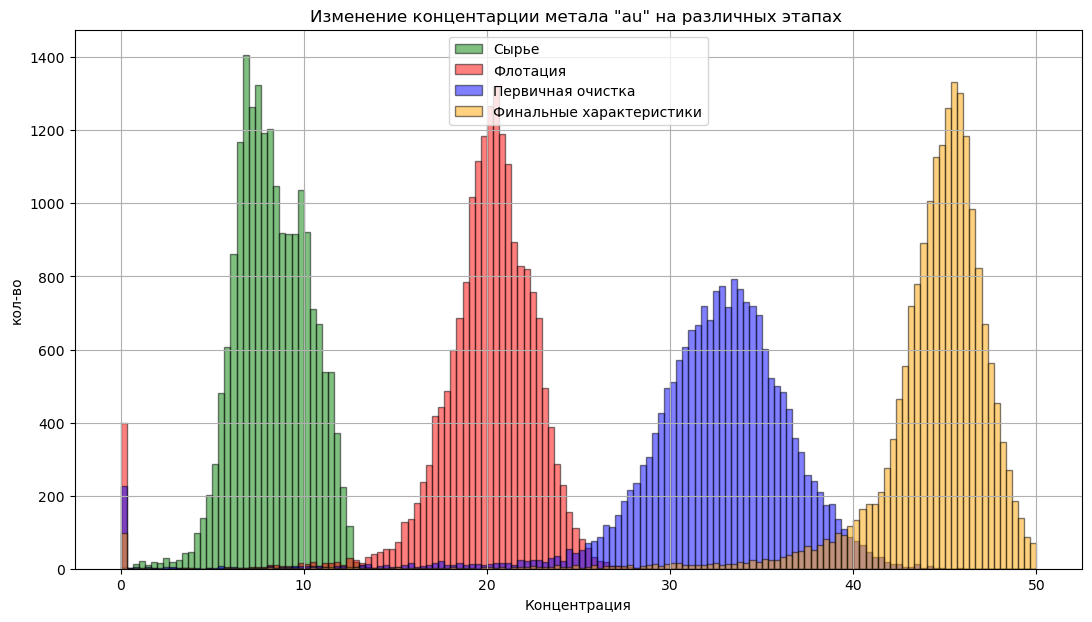

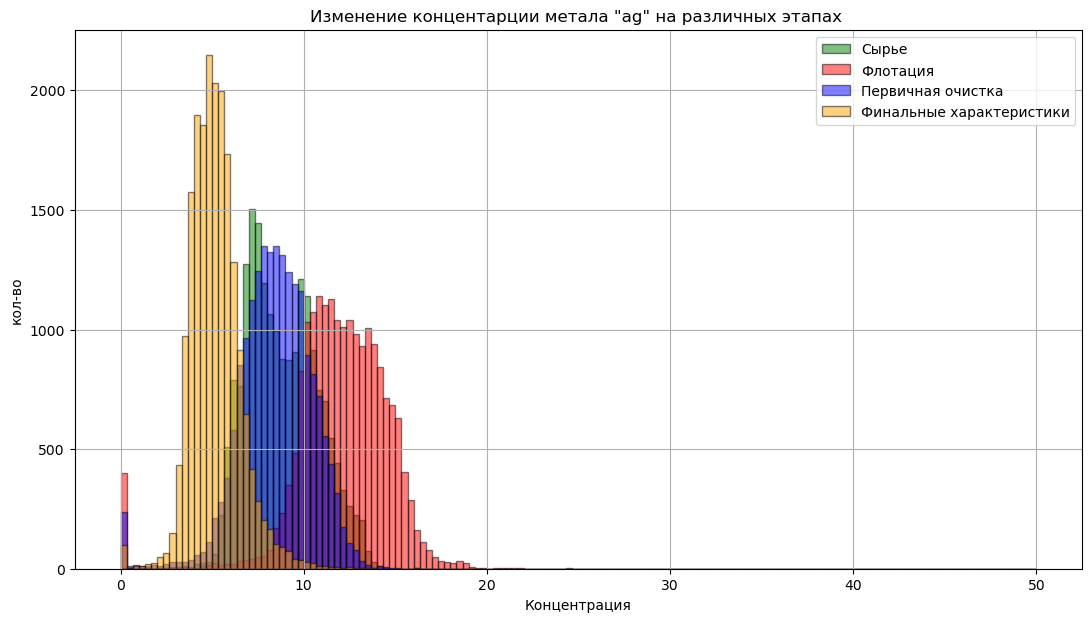

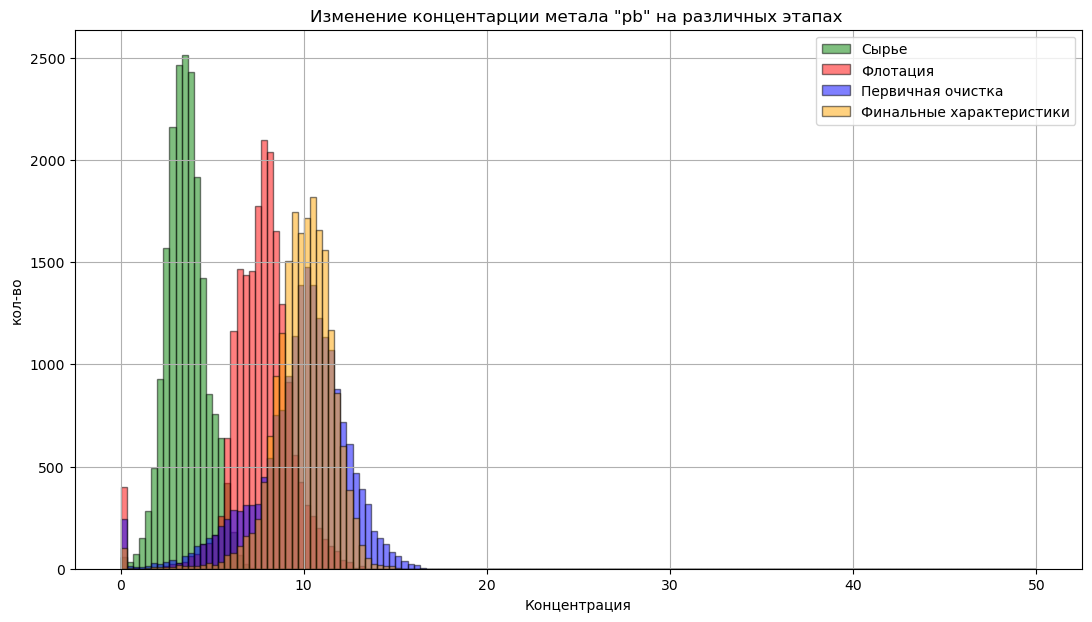

In [14]:
met_names = ['au', 'ag', 'pb']
for idx, i in enumerate(met_names): 
    df_full[f'rougher.input.feed_{i}'].hist(bins = 150 , range=(0,50 ) ,grid=True, figsize = (13,7), color = 'green', edgecolor = 'black',alpha=0.5,label='Сырье');
    df_full[f'rougher.output.concentrate_{i}'].hist(bins = 150 , range=(0,50 ) ,grid=True, figsize = (13,7), color = 'red', edgecolor = 'black',alpha=0.5,label='Флотация');
    df_full[f'primary_cleaner.output.concentrate_{i}'].hist(bins = 150 , range=(0,50 ) ,grid=True, figsize = (13,7), color = 'blue', edgecolor = 'black',alpha=0.5,label='Первичная очистка');
    df_full[f'final.output.concentrate_{i}'].hist(bins = 150 , range=(0,50 ) ,grid=True, figsize = (13,7), color = 'orange', edgecolor = 'black',alpha=0.5,label='Финальные характеристики');  
    plt.title(f'Изменение концентарции метала "{i}" на различных этапах ') 
    plt.xlabel('Концентрация')  
    plt.ylabel('кол-во')
    plt.legend()

    plt.show()

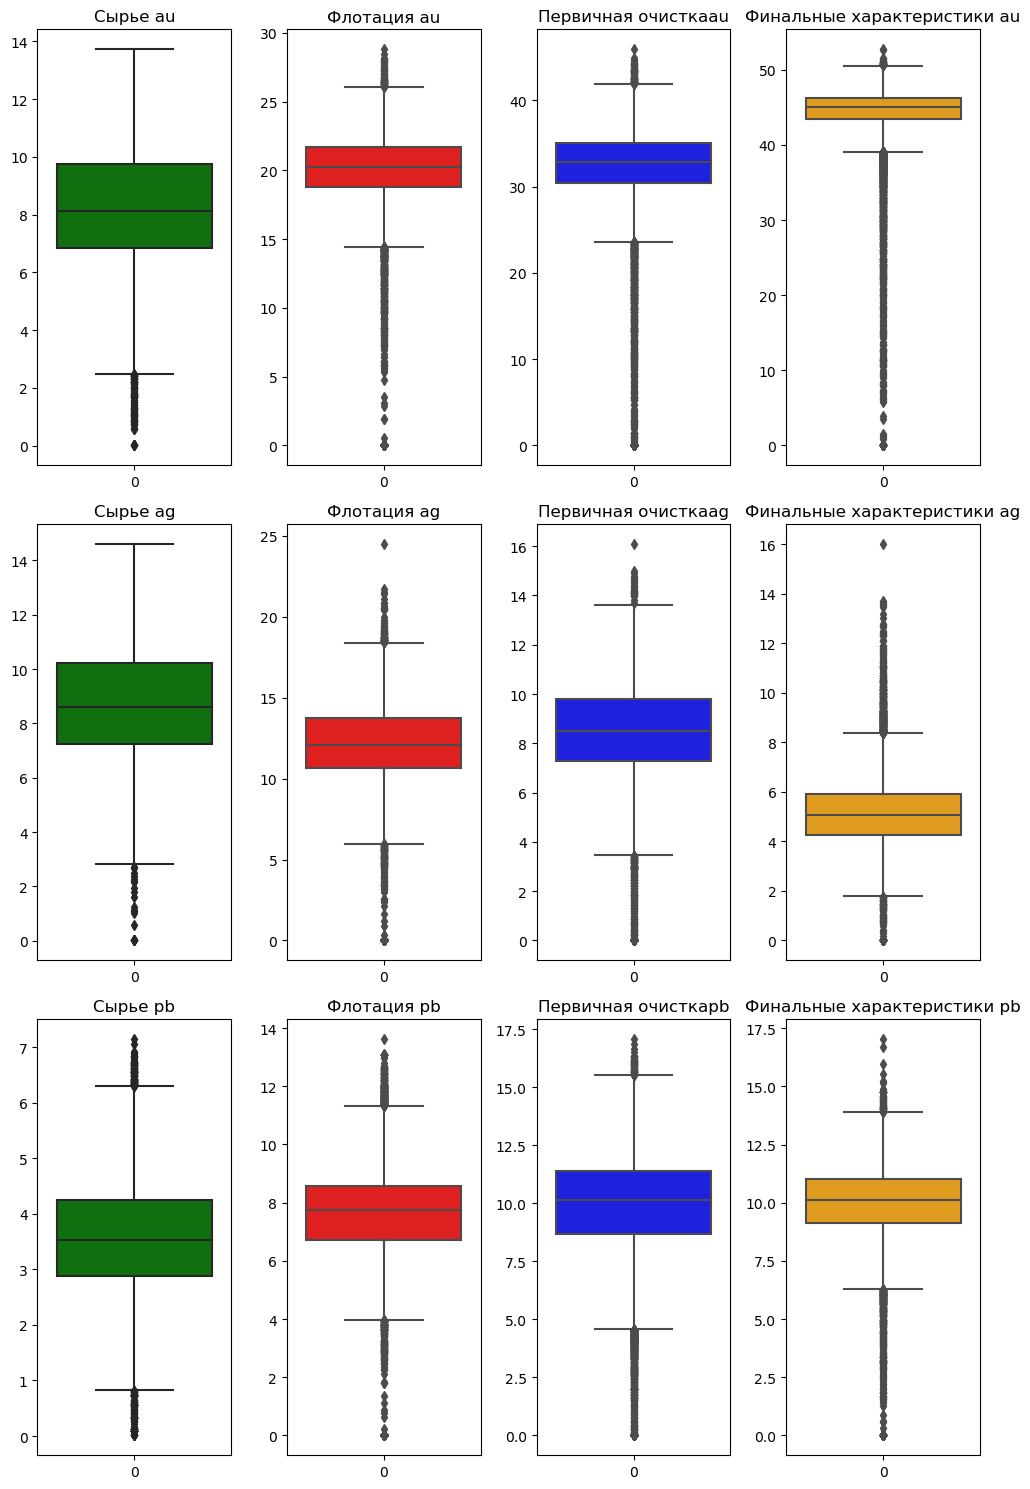

In [15]:
met_names = ['au', 'ag', 'pb']

fig, axes = plt.subplots(3, 4, figsize=(10, 15))

for idx, i in enumerate(met_names):
    sns.boxplot(data=df_full[f'rougher.input.feed_{i}'], color='green', ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Сырье {i}')
    
    sns.boxplot(data=df_full[f'rougher.output.concentrate_{i}'], color='red', ax=axes[idx, 1])
    axes[idx, 1].set_title(f'Флотация {i}')
  
    sns.boxplot(data=df_full[f'primary_cleaner.output.concentrate_{i}'], color='blue', ax=axes[idx, 2])
    axes[idx, 2].set_title(f'Первичная очистка{i}')

    sns.boxplot(data=df_full[f'final.output.concentrate_{i}'], color='orange', ax=axes[idx, 3])
    axes[idx, 3].set_title(f'Финальные характеристики {i}')

plt.tight_layout()  
plt.show()

In [16]:
met_names = ['au', 'ag', 'pb']
for idx, i in enumerate(met_names): 

    q25=df_full[f'rougher.input.feed_{i}'].quantile(0.25)
    q75=df_full[f'rougher.input.feed_{i}'].quantile(0.75)
    first_part=q25-1.5*(q75-q25)
    second_part=q75+1.5*(q75-q25)
    df_full = df_full.drop(df_full[(df_full[f'rougher.input.feed_{i}'] < first_part) | (df_full[f'rougher.input.feed_{i}'] > second_part)]  .index)

    

    q25=df_full[f'rougher.output.concentrate_{i}'].quantile(0.25)
    q75=df_full[f'rougher.output.concentrate_{i}'].quantile(0.75)
    first_part=q25-1.5*(q75-q25)
    second_part=q75+1.5*(q75-q25)
    df_full = df_full.drop(df_full[(df_full[f'rougher.output.concentrate_{i}'] < first_part) | (df_full[f'rougher.output.concentrate_{i}'] > second_part)]  .index)

    q25=df_full[f'primary_cleaner.output.concentrate_{i}'].quantile(0.25)
    q75=df_full[f'primary_cleaner.output.concentrate_{i}'].quantile(0.75)
    first_part=q25-1.5*(q75-q25)
    second_part=q75+1.5*(q75-q25)
    df_full = df_full.drop(df_full[(df_full[f'primary_cleaner.output.concentrate_{i}'] < first_part) | (df_full[f'primary_cleaner.output.concentrate_{i}'] > second_part)]  .index)
    
    q25=df_full[f'final.output.concentrate_{i}'].quantile(0.25)
    q75=df_full[f'final.output.concentrate_{i}'].quantile(0.75)
    first_part=q25-1.5*(q75-q25)
    second_part=q75+1.5*(q75-q25)
    df_full = df_full.drop(df_full[(df_full[f'final.output.concentrate_{i}'] < first_part) | (df_full[f'final.output.concentrate_{i}'] > second_part)]  .index)
    
        

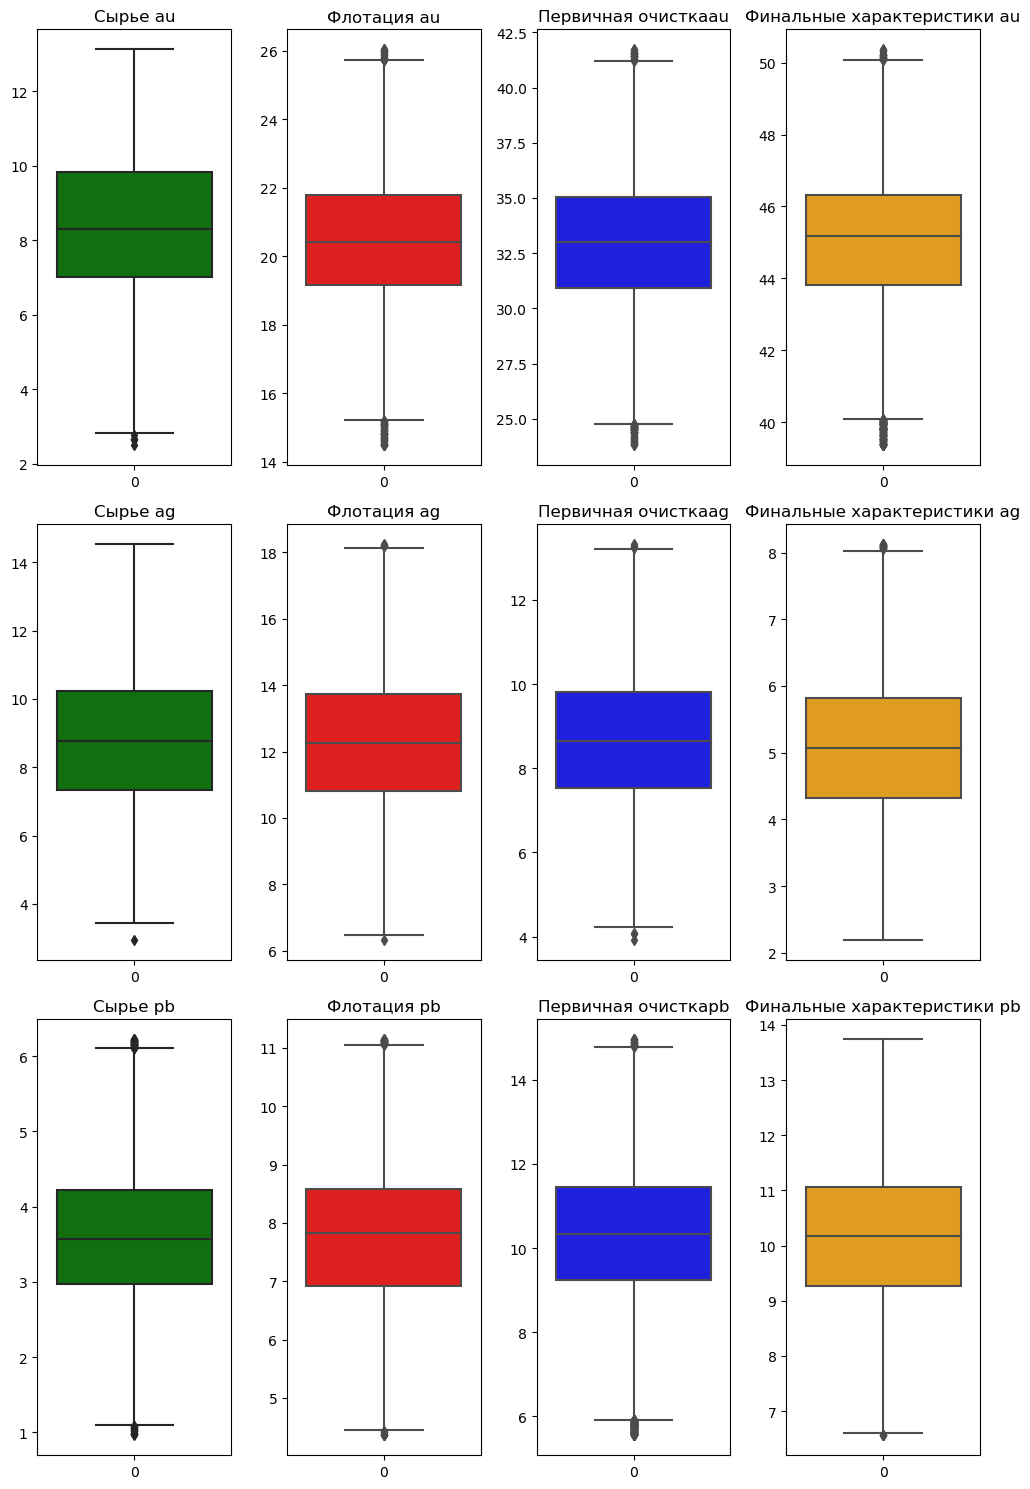

In [17]:
met_names = ['au', 'ag', 'pb']

fig, axes = plt.subplots(3, 4, figsize=(10, 15))

for idx, i in enumerate(met_names):
    sns.boxplot(data=df_full[f'rougher.input.feed_{i}'], color='green', ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Сырье {i}')
    
    sns.boxplot(data=df_full[f'rougher.output.concentrate_{i}'], color='red', ax=axes[idx, 1])
    axes[idx, 1].set_title(f'Флотация {i}')
  
    sns.boxplot(data=df_full[f'primary_cleaner.output.concentrate_{i}'], color='blue', ax=axes[idx, 2])
    axes[idx, 2].set_title(f'Первичная очистка{i}')

    sns.boxplot(data=df_full[f'final.output.concentrate_{i}'], color='orange', ax=axes[idx, 3])
    axes[idx, 3].set_title(f'Финальные характеристики {i}')

plt.tight_layout()  
plt.show()

Удаление из тренировочного набора данных выбросов.

In [18]:
df_train = df_train[df_train['date'].isin(df_full['date'])]

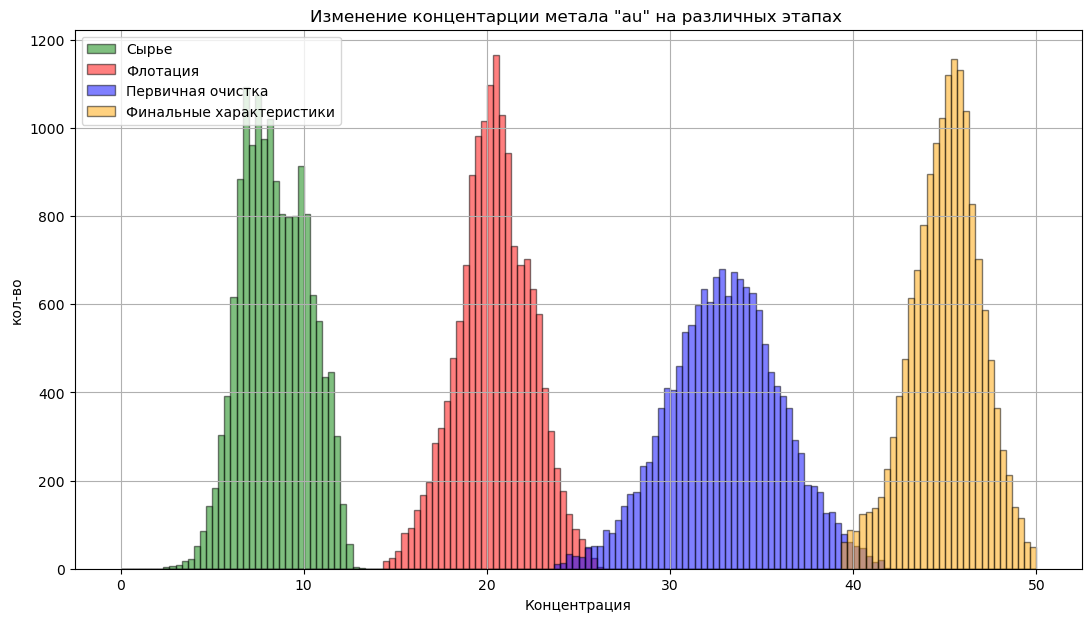

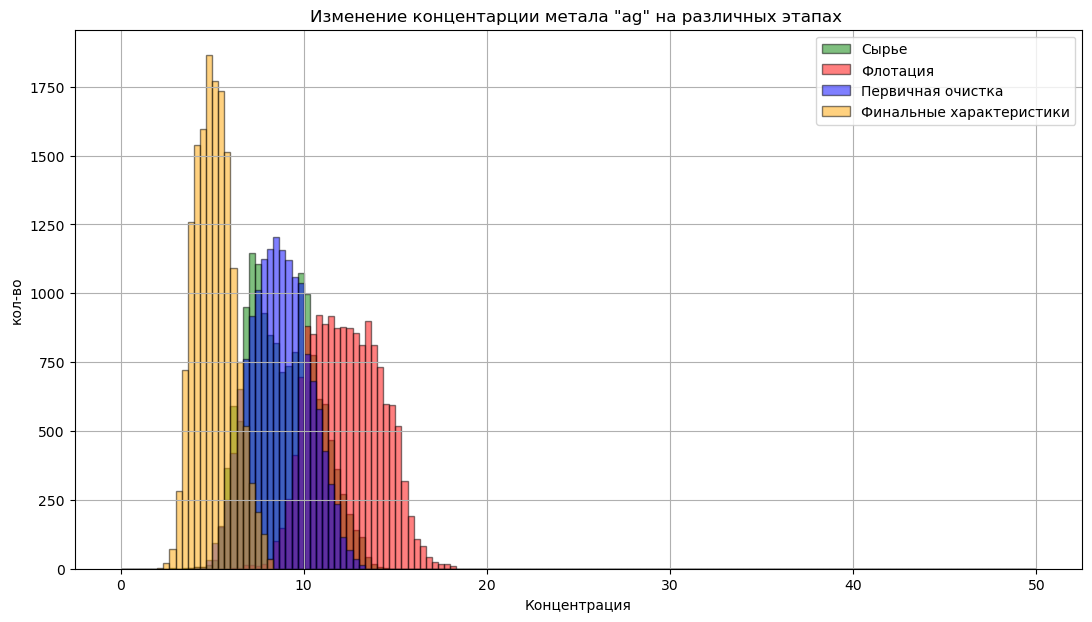

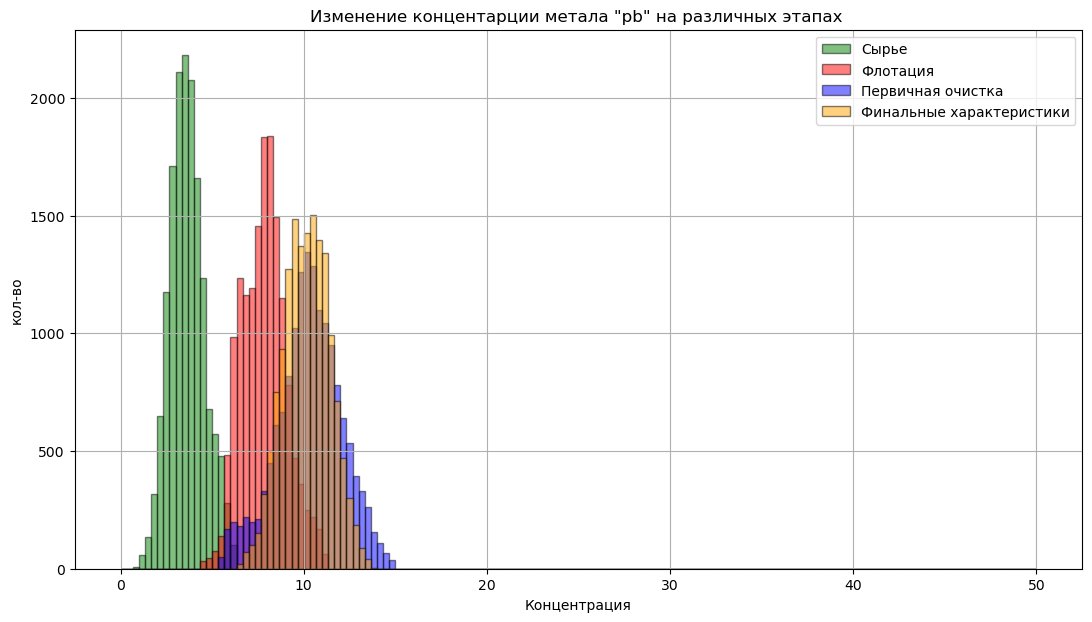

In [19]:
met_names = ['au', 'ag', 'pb']
for idx, i in enumerate(met_names): 
    df_full[f'rougher.input.feed_{i}'].hist(bins = 150 , range=(0,50 ) ,grid=True, figsize = (13,7), color = 'green', edgecolor = 'black',alpha=0.5,label='Сырье');
    df_full[f'rougher.output.concentrate_{i}'].hist(bins = 150 , range=(0,50 ) ,grid=True, figsize = (13,7), color = 'red', edgecolor = 'black',alpha=0.5,label='Флотация');
    df_full[f'primary_cleaner.output.concentrate_{i}'].hist(bins = 150 , range=(0,50 ) ,grid=True, figsize = (13,7), color = 'blue', edgecolor = 'black',alpha=0.5,label='Первичная очистка');
    df_full[f'final.output.concentrate_{i}'].hist(bins = 150 , range=(0,50 ) ,grid=True, figsize = (13,7), color = 'orange', edgecolor = 'black',alpha=0.5,label='Финальные характеристики');  
    plt.title(f'Изменение концентарции метала "{i}" на различных этапах ') 
    plt.xlabel('Концентрация')  
    plt.ylabel('кол-во')
    plt.legend()

    plt.show()

Как видно из графиков с каждым этапом  концентрация Au - золота растет , концентрация Ag - серебра  с каждым этапом падает, Pb - свинца изменяется не значительно  

2.2.  Сравним распределения размеров гранул исходного сырья на обучающей и тестовой выборках.

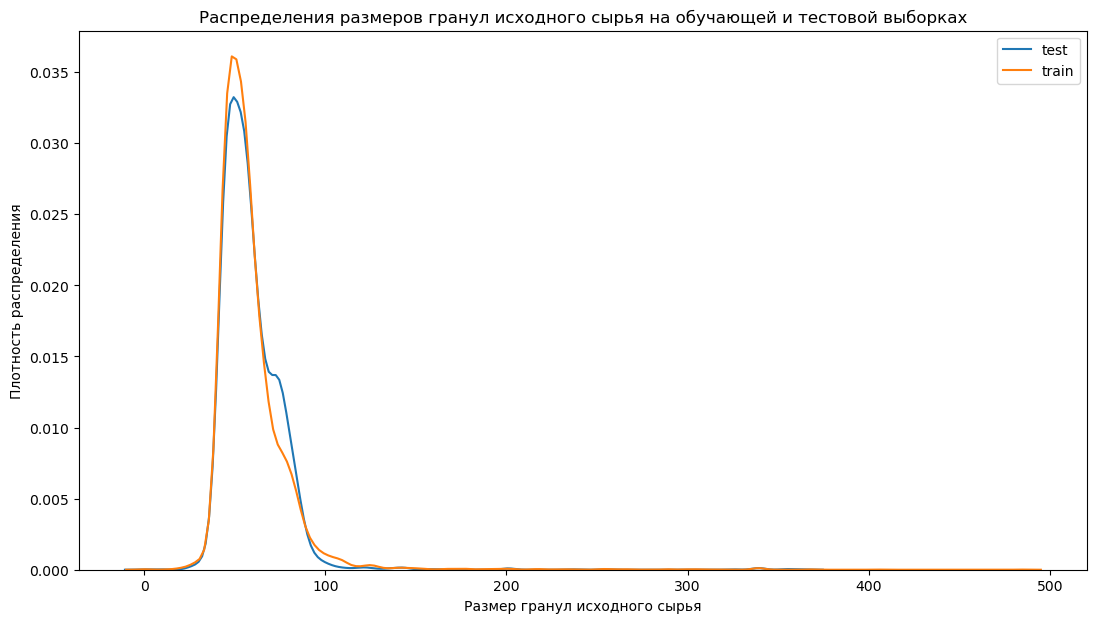

In [20]:
plt.figure(figsize=(13, 7))
sns.kdeplot(data = df_test['rougher.input.feed_size'],label='test')
sns.kdeplot(data = df_train['rougher.input.feed_size'],label='train')
plt.title('Распределения размеров гранул исходного сырья на обучающей и тестовой выборках') 

plt.xlabel('Размер гранул исходного сырья')  
plt.ylabel('Плотность распределения')

plt.legend()

plt.show()

Пропорции распределения размеров гранул исходного сырья  на обучающей и тестовой выборке сохраняются.

2.3. Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

In [21]:
rougher_input = (df_full['rougher.input.feed_au']+           
                   df_full['rougher.input.feed_ag']+                     
                   df_full['rougher.input.feed_pb']
                   )


In [22]:
rougher_concentrate = (df_full['rougher.output.concentrate_au']+           
                   df_full['rougher.output.concentrate_ag']+                     
                   df_full['rougher.output.concentrate_pb']
                   )


In [23]:
primary_concentrate = (df_full['primary_cleaner.output.concentrate_au']+           
                      df_full['primary_cleaner.output.concentrate_ag']+                     
                      df_full['primary_cleaner.output.concentrate_pb']
                      )

In [24]:
final_concentrate = (df_full['final.output.concentrate_au']+           
                      df_full['final.output.concentrate_ag']+                     
                      df_full['final.output.concentrate_pb']
                      )

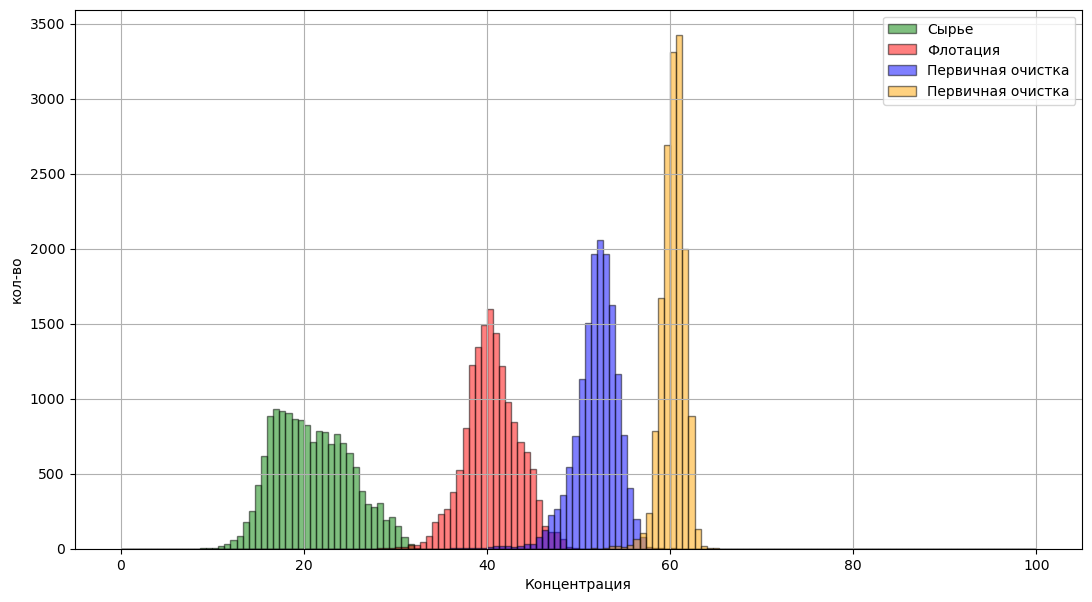

In [25]:
met_names = ['au', 'ag', 'pb']
rougher_input.hist(bins = 150 , range=(0,100 ) ,grid=True, figsize = (13,7), color = 'green', edgecolor = 'black',alpha=0.5,label='Сырье');
rougher_concentrate.hist(bins = 150 , range=(0,100 ) ,grid=True, figsize = (13,7), color = 'red', edgecolor = 'black',alpha=0.5,label='Флотация');
primary_concentrate.hist(bins = 150 , range=(0,100 ) ,grid=True, figsize = (13,7), color = 'blue', edgecolor = 'black',alpha=0.5,label='Первичная очистка');
final_concentrate.hist(bins = 150 , range=(0,100 ) ,grid=True, figsize = (13,7), color = 'orange', edgecolor = 'black',alpha=0.5,label='Первичная очистка');

plt.xlabel('Концентрация')  
plt.ylabel('кол-во')
plt.legend()

plt.show()

Суммарная концентрация металлов после каждого этапа растет, что говорит о что говорит о качестве очистки. Концентрация металлов возросла с 40 до 60% 

### Анализ данных выводы
Металлы:

Au - золото,

Ag - серебро, 

Pb - свинец.

2.1. Рассмотрев как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате  можно сказать, что  с каждым этапом  концентрация Au - золота растет , концентрация Ag - серебра  с каждым этапом падает, Pb - свинца изменяется не значительно.
2.2.  Сравнив распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Выявлено, что пропорции распределения размеров гранул исходного сырья  на обучающей и тестовой выборке сохраняются.
2.3. Исследовав суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Можно сказать, что суммарная концентрация металлов после каждого этапа растет, что говорит о что говорит о качестве очистки. Концентрация металлов возросла с 40 до 60%


## Модель

3.1. Напишим функцию для вычисления итоговой sMAPE.

In [26]:

def smape (target, predictions):
    
    smape=((np.abs(target - predictions)*100/((np.abs(target )+np.abs(predictions)/2))).sum())/len(predictions)
    
    return smape


def smapef (smape1, smape2):

    smapef=0.25*smape1+0.75*smape2
    
    return smapef

In [27]:
smape_score=make_scorer(smape, greater_is_better=False)

Удалим параметры из тренировочной выборки, которые не доступны в тестовой выборке.

In [28]:
[[col for col in df_train.columns if col not in df_test.columns]]

[['rougher.calculation.sulfate_to_au_concentrate',
  'rougher.calculation.floatbank10_sulfate_to_au_feed',
  'rougher.calculation.floatbank11_sulfate_to_au_feed',
  'rougher.calculation.au_pb_ratio',
  'rougher.output.concentrate_au',
  'rougher.output.concentrate_ag',
  'rougher.output.concentrate_pb',
  'rougher.output.concentrate_sol',
  'rougher.output.tail_au',
  'rougher.output.tail_ag',
  'rougher.output.tail_pb',
  'rougher.output.tail_sol',
  'primary_cleaner.output.concentrate_au',
  'primary_cleaner.output.concentrate_ag',
  'primary_cleaner.output.concentrate_pb',
  'primary_cleaner.output.concentrate_sol',
  'primary_cleaner.output.tail_au',
  'primary_cleaner.output.tail_ag',
  'primary_cleaner.output.tail_pb',
  'primary_cleaner.output.tail_sol',
  'secondary_cleaner.output.tail_au',
  'secondary_cleaner.output.tail_ag',
  'secondary_cleaner.output.tail_pb',
  'secondary_cleaner.output.tail_sol',
  'final.output.concentrate_au',
  'final.output.concentrate_ag',
  'final.

In [29]:
df_train_drop=df_train.drop(['rougher.calculation.sulfate_to_au_concentrate',
  'rougher.calculation.floatbank10_sulfate_to_au_feed',
  'rougher.calculation.floatbank11_sulfate_to_au_feed',
  'rougher.calculation.au_pb_ratio',
  'rougher.output.concentrate_au',
  'rougher.output.concentrate_ag',
  'rougher.output.concentrate_pb',
  'rougher.output.concentrate_sol',
  'rougher.output.tail_au',
  'rougher.output.tail_ag',
  'rougher.output.tail_pb',
  'rougher.output.tail_sol',
  'primary_cleaner.output.concentrate_au',
  'primary_cleaner.output.concentrate_ag',
  'primary_cleaner.output.concentrate_pb',
  'primary_cleaner.output.concentrate_sol',
  'primary_cleaner.output.tail_au',
  'primary_cleaner.output.tail_ag',
  'primary_cleaner.output.tail_pb',
  'primary_cleaner.output.tail_sol',
  'secondary_cleaner.output.tail_au',
  'secondary_cleaner.output.tail_ag',
  'secondary_cleaner.output.tail_pb',
  'secondary_cleaner.output.tail_sol',
  'final.output.concentrate_au',
  'final.output.concentrate_ag',
  'final.output.concentrate_pb',
  'final.output.concentrate_sol',
  'final.output.tail_au',
  'final.output.tail_ag',
  'final.output.tail_pb',
  'final.output.tail_sol'], axis=1)

Построим корреляционную матрицу на основе отобранных параметров, и выберем параметры с набольшей корреляцией 

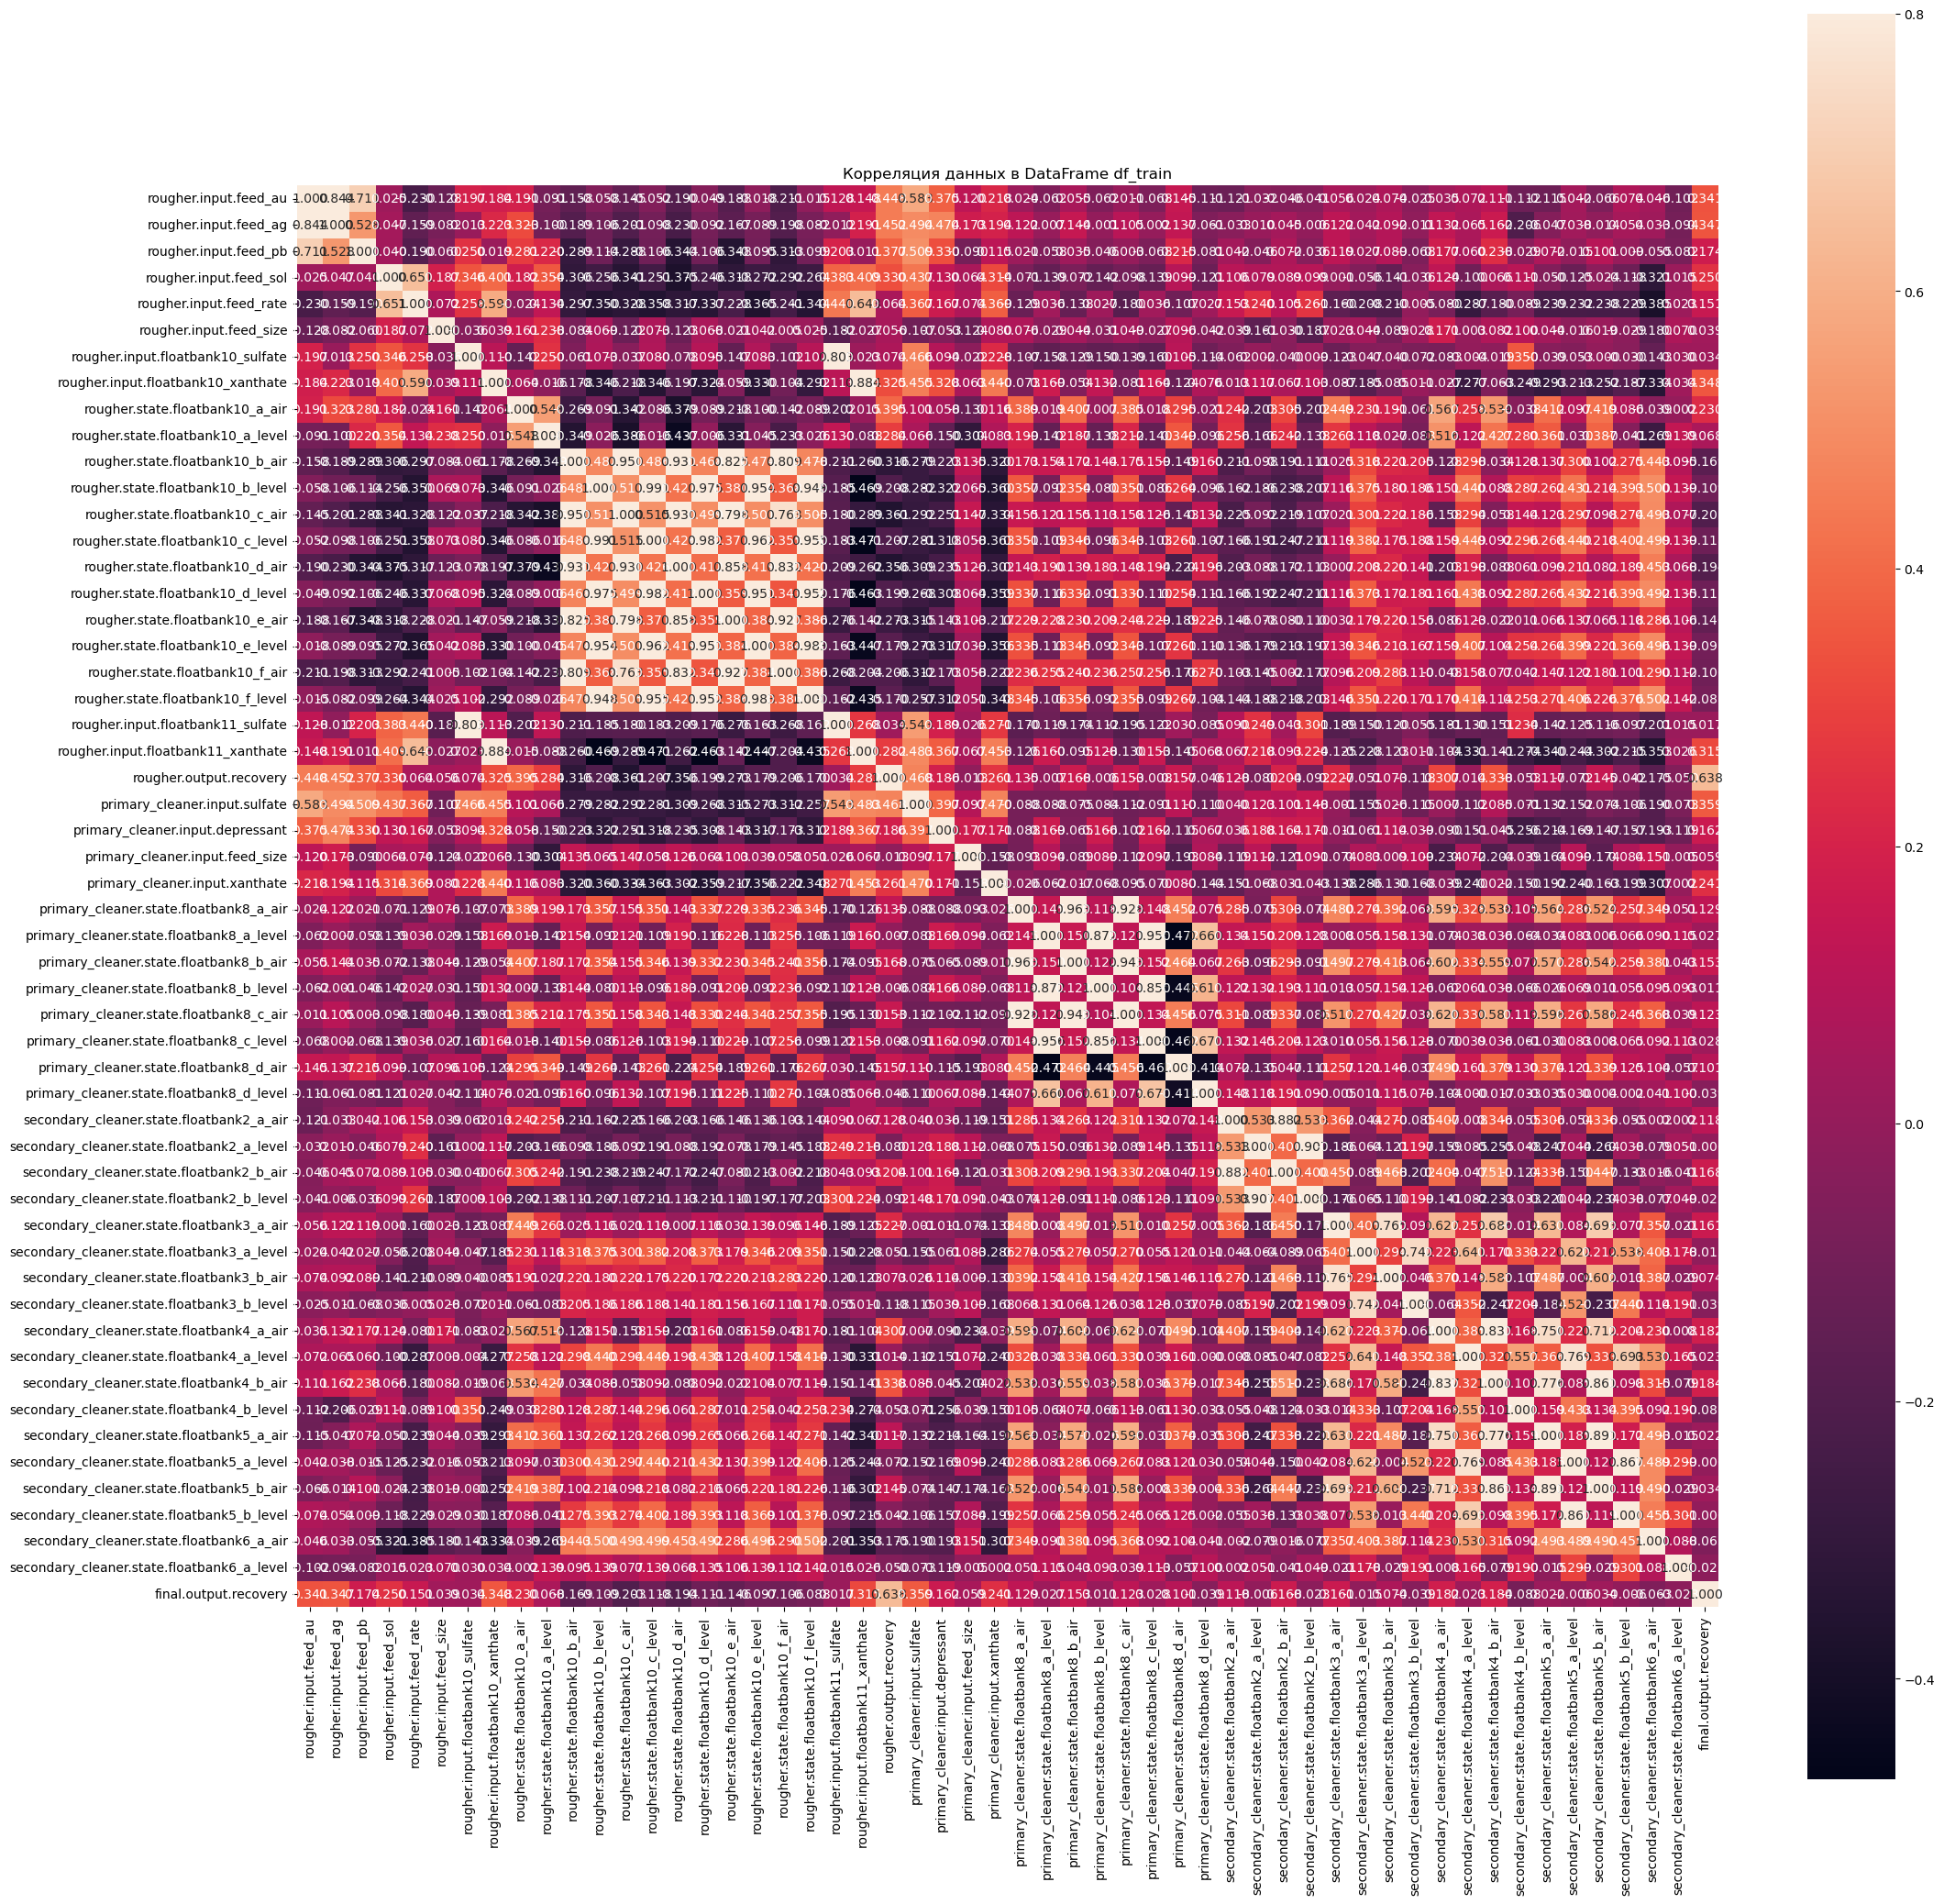

In [30]:
corrmat = df_train_drop.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, fmt=".3f",ax=ax);
ax.set_title(f'Корреляция данных в DataFrame df_train');

Удалим один из двух признаков которые имеют корреляцию между собой больше  0.9 тренировочной выборки   

In [31]:
upper = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

df_train_drop.drop(to_drop, axis=1, inplace=True)

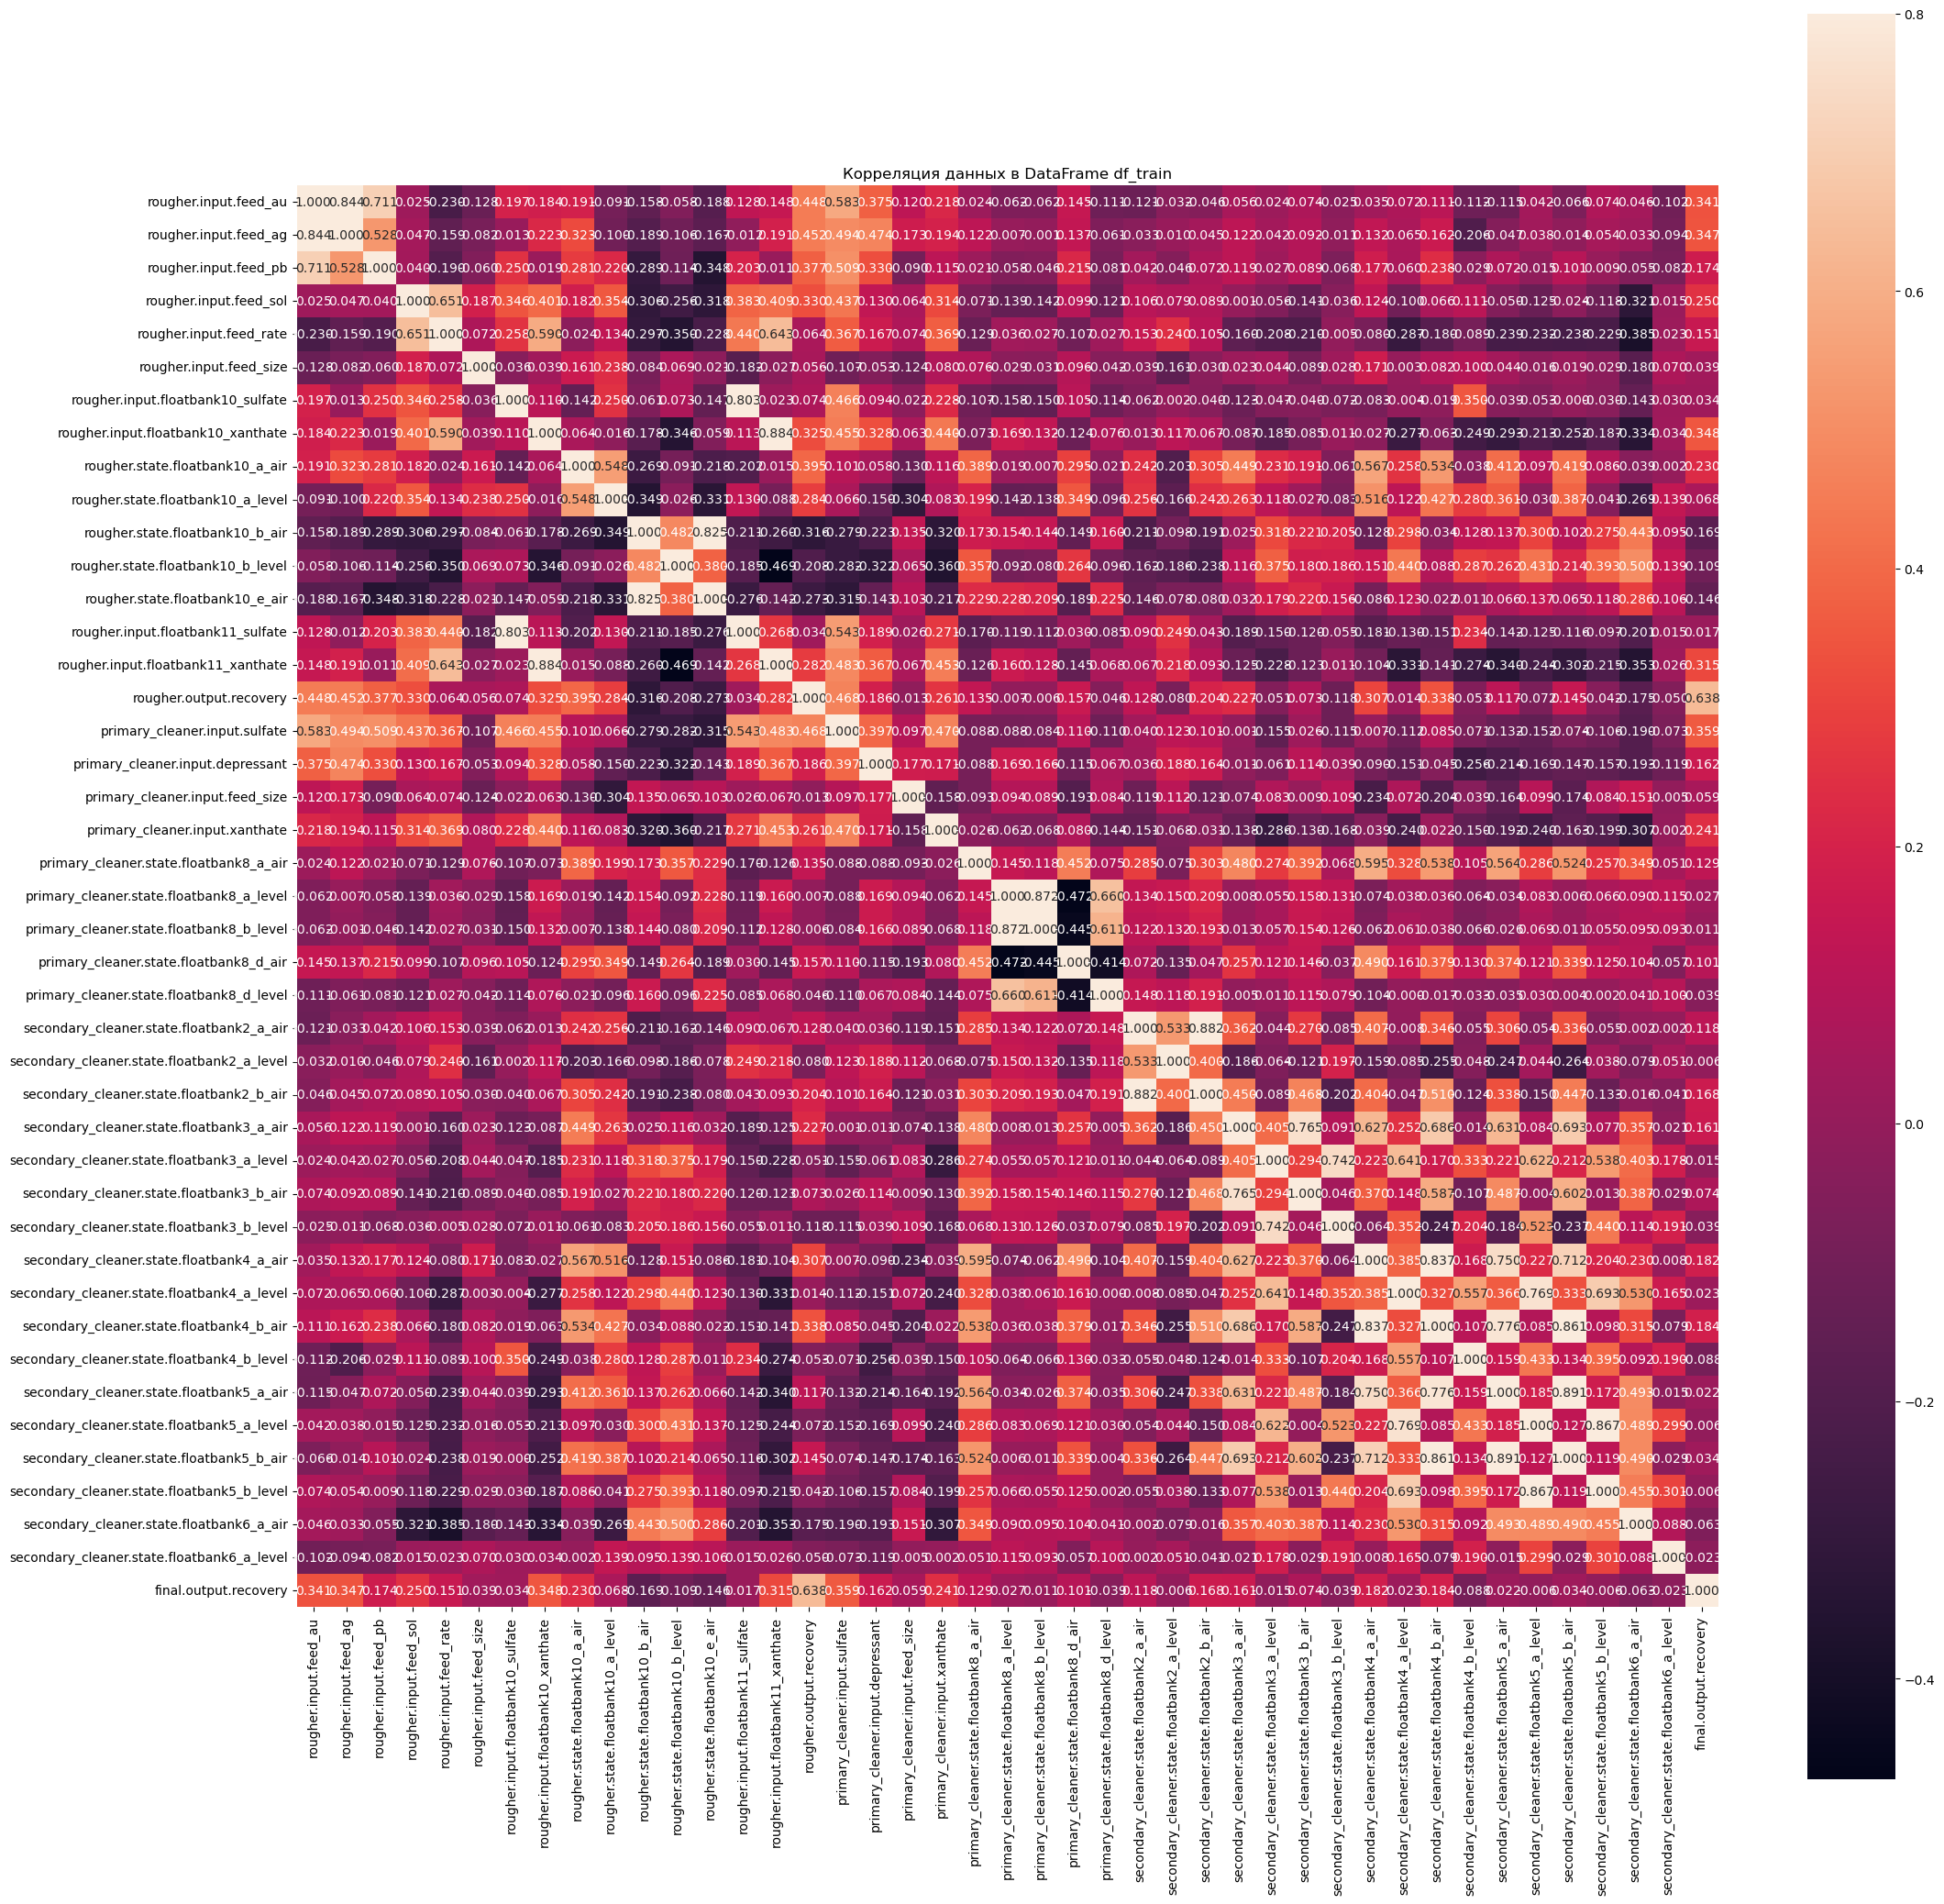

In [32]:
corrmat = df_train_drop.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, fmt=".3f",ax=ax);
ax.set_title(f'Корреляция данных в DataFrame df_train');

In [33]:
features_train=df_train_drop.drop(columns=['date','rougher.output.recovery','final.output.recovery'])

In [34]:
features_train.head(5)

rougher.input.feed_au  rougher.input.feed_ag  rougher.input.feed_pb  \
0               6.486150               6.100378               2.284912   
1               6.478583               6.161113               2.266033   
2               6.362222               6.116455               2.159622   
3               6.118189               6.043309               2.037807   
4               5.663707               6.060915               1.786875   

   rougher.input.feed_sol  rougher.input.feed_rate  rougher.input.feed_size  \
0               36.808594               523.546326                55.486599   
1               35.753385               525.290581                57.278666   
2               35.971630               530.026610                57.510649   
3               36.862241               542.590390                57.792734   
4               34.347666               540.531893                56.047189   

   rougher.input.floatbank10_sulfate  rougher.input.floatbank10_xanthate  \
0                          11.986616                            6.007990   
1                          11.971193                            6.005766   
2                          11.920603                            6.197377   
3                          11.630094                            6.203177   
4                          10.957755                            6.198826   

   rougher.state.floatbank10_a_air  rougher.state.floatbank10_a_level  \
0                       999.706909                        -404.066986   
1                      1000.286398                        -400.065196   
2                       999.719565                        -400.074028   
3                       999.814770                        -400.200179   
4                       999.678690                        -399.752729   

   rougher.state.floatbank10_b_air  rougher.state.floatbank10_b_level  \
0                      1603.011353                        -434.715027   
1                      1600.754587                        -449.953435   
2                      1599.337330                        -450.008530   
3                      1600.059442                        -450.619948   
4                      1600.208824                        -449.599614   

   rougher.state.floatbank10_e_air  rougher.input.floatbank11_sulfate  \
0                      1404.472046                          11.836743   
1                      1399.227084                          11.996163   
2                      1399.180945                          11.920305   
3                      1400.943157                          11.692450   
4                      1401.560902                          10.960521   

   rougher.input.floatbank11_xanthate  primary_cleaner.input.sulfate  \
0                            6.005818                     127.092003   
1                            6.012594                     125.629232   
2                            6.204633                     123.819808   
3                            6.196578                     122.270188   
4                            6.194897                     117.988169   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         10.128295                             7.25   
1                         10.296251                             7.25   
2                         11.316280                             7.25   
3                         11.322140                             7.25   
4                         11.913613                             7.25   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        0.988759                             1549.775757   
1                        1.002663                             1576.166671   
2                        0.991265                             1601.556163   
3                        0.996739                             1599.968720   
4                        1.009869                         

In [35]:
targets_train=df_train_drop[['rougher.output.recovery','final.output.recovery']]

In [36]:
targets_train.head(5)

rougher.output.recovery  final.output.recovery
0                87.107763              70.541216
1                86.843261              69.266198
2                86.842308              68.116445
3                87.226430              68.347543
4                86.688794              66.927016

In [37]:
features_train.shape

(11521, 41)

In [38]:
targets_train.shape

(11521, 2)

Удалим один из двух признаков которые имеют корреляцию между собой больше  0.9 из тестовой выборки

In [39]:
[[col for col in df_test.columns if col not in df_train_drop.columns]]


[['rougher.state.floatbank10_c_air',
  'rougher.state.floatbank10_c_level',
  'rougher.state.floatbank10_d_air',
  'rougher.state.floatbank10_d_level',
  'rougher.state.floatbank10_e_level',
  'rougher.state.floatbank10_f_air',
  'rougher.state.floatbank10_f_level',
  'primary_cleaner.state.floatbank8_b_air',
  'primary_cleaner.state.floatbank8_c_air',
  'primary_cleaner.state.floatbank8_c_level',
  'secondary_cleaner.state.floatbank2_b_level']]

In [40]:
features_test=df_test.drop(columns=['rougher.state.floatbank10_c_air',
  'rougher.state.floatbank10_c_level',
  'rougher.state.floatbank10_d_air',
  'rougher.state.floatbank10_d_level',
  'rougher.state.floatbank10_e_level',
  'rougher.state.floatbank10_f_air',
  'rougher.state.floatbank10_f_level',
  'primary_cleaner.state.floatbank8_b_air',
  'primary_cleaner.state.floatbank8_c_air',
  'primary_cleaner.state.floatbank8_c_level',
  'secondary_cleaner.state.floatbank2_b_level'])

In [41]:
features_test=features_test.drop(columns=['date','rougher.output.recovery','final.output.recovery'])

In [42]:
targets_test=df_test[['rougher.output.recovery','final.output.recovery']]

In [43]:
features_test.shape

(4860, 41)

In [44]:
targets_test.shape

(4860, 2)

In [45]:
model = LinearRegression()

model.fit(features_train, targets_train)

coefficients = model.coef_

for i, coef in enumerate(coefficients):
    print(f"Значиность признаков для целевого признака {i}: {coef}")

Значиность признаков для целевого признака 0: [ 7.75046989e-01  2.04858412e-01 -4.95190541e-01  3.34115960e-01
 -1.77198077e-02 -6.94347289e-03  6.52029979e-03  4.81589396e-01
 -6.61444989e-04  9.30141249e-03 -4.55412482e-03  3.28035366e-03
 -4.00713499e-04 -2.75353122e-01  9.08828306e-01  4.76729685e-02
 -1.11072428e-01  3.94133258e-01 -4.09651211e-01  3.74434006e-03
 -2.53509604e-03  1.16398361e-02 -1.23038422e-03  9.04599401e-04
  2.90197292e-02 -8.55592376e-03  6.97050867e-02  2.00862954e-01
 -1.66797200e-02 -2.15794635e-01  1.55159777e-02 -2.58124632e-01
  1.19007796e-02  4.11586842e-01 -3.52209659e-03  2.47466934e-01
  3.30109749e-04 -1.85226422e-01  4.55622239e-03 -2.09629908e-01
  2.59685659e-04]
Значиность признаков для целевого признака 1: [ 1.58797672e+00 -1.35552955e-01 -1.42157855e+00  1.97179373e-01
 -1.05718723e-03  1.55036918e-03  9.23190682e-02  4.34946767e-01
 -1.17455764e-03 -1.25468863e-03 -1.97472135e-04  1.03153751e-02
 -3.42512232e-03 -3.71851564e-01  1.10682520e

In [46]:
df_features_train = pd.DataFrame(columns=features_train.columns)

Обучим разные модели и оценим их качество кросс-валидацией

In [47]:
%%time

pipelineLR = Pipeline([
                    ('scaler', StandardScaler()),
                    ('model', LinearRegression())
                    ])

CPU times: total: 0 ns
Wall time: 0 ns


In [48]:
crossLR= -cross_val_score(pipelineLR, features_train, targets_train, cv=5).mean()

smape1=-cross_val_score(pipelineLR, features_train.loc[:,'rougher.input.feed_au':'rougher.input.floatbank11_xanthate'], targets_train['rougher.output.recovery'], cv=5, scoring=smape_score).mean()
smape2=-cross_val_score(pipelineLR, features_train, targets_train['final.output.recovery'], cv=5, scoring=smape_score).mean()



print('Значение метрики качества SMAPE для эффективность обогащения чернового концентрата =',smape1)
print('Значение метрики качества SMAPE для эффективность обогащения финального концентрата =',smape2)
print('Итоговое SMAPE значение метрики качества =',smapef (smape1, smape2))

Значение метрики качества SMAPE для эффективность обогащения чернового концентрата = 4.0273477608831385
Значение метрики качества SMAPE для эффективность обогащения финального концентрата = 6.1021660245071345
Итоговое SMAPE значение метрики качества = 5.5834614586011355


In [49]:
%%time
pipelineDT = Pipeline([('scaler', StandardScaler()),
                     ('model', DecisionTreeRegressor(random_state=12345))
                   ])


parametersDT = {'model__max_depth': [4, 8, 12], 
               'model__min_samples_split': [2, 4, 8]
             }


grid_DT_smape1 = GridSearchCV(pipelineDT, parametersDT, cv=5, scoring=smape_score, n_jobs=-1)
grid_DT_smape1.fit( features_train.loc[:,'rougher.input.feed_au':'rougher.input.floatbank11_xanthate'], targets_train['rougher.output.recovery'])

grid_DT_smape2 = GridSearchCV(pipelineDT, parametersDT, cv=5, scoring=smape_score, n_jobs=-1)
grid_DT_smape2.fit( features_train, targets_train['final.output.recovery'])


best_smape1_DT = -grid_DT_smape1.best_score_
best_smape2_DT = -grid_DT_smape2.best_score_

print('Значение метрики качества SMAPE для эффективность обогащения чернового концентрата =',best_smape1_DT)
print('Значение метрики качества SMAPE для эффективность обогащения финального концентрата =',best_smape2_DT)
print('Итоговое SMAPE значение метрики качества =',smapef (best_smape1_DT, best_smape2_DT))

Значение метрики качества SMAPE для эффективность обогащения чернового концентрата = 4.514081558264325
Значение метрики качества SMAPE для эффективность обогащения финального концентрата = 5.832304784871103
Итоговое SMAPE значение метрики качества = 5.502748978219408
CPU times: total: 1.16 s
Wall time: 17.1 s


In [50]:
%%time

pipelineRF = Pipeline([
                        ('scaler', StandardScaler()),
                        ('model', RandomForestRegressor(random_state=12345))
                      ])


parametersRF = { 'model__n_estimators': [50, 100, 200],
                 'model__max_depth': [4, 8, 12], 
                 'model__min_samples_split': [2, 4, 8]
               }



grid_RF_smape1 = GridSearchCV(pipelineRF, parametersRF, cv=5, scoring=smape_score, n_jobs=-1)
grid_RF_smape1.fit( features_train.loc[:,'rougher.input.feed_au':'rougher.input.floatbank11_xanthate'], targets_train['rougher.output.recovery'])

grid_RF_smape2 = GridSearchCV(pipelineRF, parametersRF, cv=5, scoring=smape_score, n_jobs=-1)
grid_RF_smape2.fit( features_train, targets_train['final.output.recovery'])


best_smape1_RF = -grid_RF_smape1.best_score_
best_smape2_RF = -grid_RF_smape2.best_score_

print('Значение метрики качества SMAPE для эффективность обогащения чернового концентрата =',best_smape1_RF)
print('Значение метрики качества SMAPE для эффективность обогащения финального концентрата =',best_smape2_RF)
print('Итоговое SMAPE значение метрики качества =',smapef (best_smape1_RF, best_smape2_RF))

Значение метрики качества SMAPE для эффективность обогащения чернового концентрата = 3.900750182821993
Значение метрики качества SMAPE для эффективность обогащения финального концентрата = 5.472692357836304
Итоговое SMAPE значение метрики качества = 5.079706814082726
CPU times: total: 1min 27s
Wall time: 12h 28min 55s


Наилучшее качество показала модель случайного леса с итоговым значение метрики качества SMAPE  = 5.07

Расчёт метрики SMAPE  для тестовой модели

In [51]:
predictions_smape1 = grid_RF_smape1.predict(features_test.loc[:,'rougher.input.feed_au':'rougher.input.floatbank11_xanthate'])
predictions_smape2 = grid_RF_smape2.predict(features_test)

smape1=smape (targets_test['rougher.output.recovery'], predictions_smape1)
smape2=smape (targets_test['final.output.recovery'], predictions_smape2)


print('Значение метрики качества SMAPE для эффективность обогащения чернового концентрата =', smape1)
print('Значение метрики качества SMAPE для эффективность обогащения финального концентрата =',smape2)
print('Итоговое SMAPE значение метрики качества =',smapef (smape1, smape2))

Значение метрики качества SMAPE для эффективность обогащения чернового концентрата = 2.135951970231028
Значение метрики качества SMAPE для эффективность обогащения финального концентрата = 5.1005663918074875
Итоговое SMAPE значение метрики качества = 4.3594127864133725


Поверим модель на адекватность качестве константной модели воспользуемся DummyRegressor

In [52]:


dummy_regr1 = DummyRegressor(strategy="mean")
dummy_regr2 = DummyRegressor(strategy="mean")

dummy_regr_smape1=dummy_regr1.fit(features_train.loc[:,'rougher.input.feed_au':'rougher.input.floatbank11_xanthate'], targets_train['rougher.output.recovery'])
dummy_regr_smape2=dummy_regr2.fit(features_train, targets_train['final.output.recovery'])

dummy_regr_predictions_smape1 = dummy_regr_smape1.predict(features_test.loc[:,'rougher.input.feed_au':'rougher.input.floatbank11_xanthate'])
dummy_regr_predictions_smape2 = dummy_regr_smape2.predict(features_test)

smape1=smape (targets_test['rougher.output.recovery'], dummy_regr_predictions_smape1)
smape2=smape (targets_test['final.output.recovery'], dummy_regr_predictions_smape2)


#smape1=-cross_val_score(dummy_regr, features_train.loc[:,'rougher.input.feed_au':'rougher.input.floatbank11_xanthate'], targets_train['rougher.output.recovery'], cv=5, scoring=smape_score).mean()
#smape2=-cross_val_score(pipelineLR, features_train, targets_train['final.output.recovery'], cv=5, scoring=smape_score).mean()

print('Значение метрики качества SMAPE для эффективность обогащения чернового концентрата =',smape1)
print('Значение метрики качества SMAPE для эффективность обогащения финального концентрата =',smape2)
print('Итоговое SMAPE значение метрики качества =',smapef (smape1, smape2))



Значение метрики качества SMAPE для эффективность обогащения чернового концентрата = 4.008585966684461
Значение метрики качества SMAPE для эффективность обогащения финального концентрата = 6.21962379925416
Итоговое SMAPE значение метрики качества = 5.666864341111736


Проверка на  адекватность показала, что качество  модели случайного леса  SMAPE =4.35 лучше константой модели SMAPE =5.66.
Что в два раза лучше константной модели. Следовательно модель случайного леса может принята в работу.


### Модель выводы:

Наилучшее качество показала модель случайного леса с итоговым значение метрики качества SMAPE  = 4.35

Проверка на адекватность показала, что качество модели случайного леса SMAPE =4.35 лучше константой модели SMAPE =5.66.

Что в два раза лучше константной модели. Следовательно модель случайного леса может принята в работу.


### Выводы

###  Подготовка данных выводы
В полученных таблицах предоставлены данные по переработке руды.
Данные представленыв трех таблицах. 
В Dataframe df_test количество признаков, меньше чем в df_train и df_full.
Данные в таблицах представлены следующих типов: object, float64.
 
Технологический процесс

    Rougher feed — исходное сырье
    Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
    Xanthate — ксантогенат (промотер, или активатор флотации);
    Sulphate — сульфат (на данном производстве сульфид натрия);
    Depressant — депрессант (силикат натрия).
    Rougher process (англ. «грубый процесс») — флотация
    Rougher tails — отвальные хвосты
    Float banks — флотационная установка
    Cleaner process — очистка
    Rougher Au — черновой концентрат золота
    Final Au — финальный концентрат золота
    
Параметры этапов

    air amount — объём воздуха
    fluid levels — уровень жидкости
    feed size — размер гранул сырья
    feed rate — скорость подачи
    Наименование признаков
    Наименование признаков должно быть такое:
    [этап].[тип_параметра].[название_параметра]
    Пример: rougher.input.feed_ag
    Возможные значения для блока [этап]:
    rougher — флотация
    primary_cleaner — первичная очистка
    secondary_cleaner — вторичная очистка
    final — финальные характеристики
    Возможные значения для блока [тип_параметра]:
input — параметры сырья
    output — параметры продукта
    state — параметры, характеризующие текущее состояние этапа
    calculation — расчётные характеристики

Так как значение MAE стремится к нулю, что говорит о том что между полученными расчётами и значением признака rougher.output.recovery  нет существенной разницы.  Соответственно расчет эффективности обогащения  достоверен.
Были выявлены  пропущенные параметры. 
Всего отсутствующих параметров  34 данные параметры относятся:
output — параметры продукта
calculation — расчётные характеристики.
Учитывая, что близкие по времени параметры имели  схожие характеристики пропущенные ячейки были заполнены ближайшими значениями методом 'ffill'

### Анализ данных выводы
Металлы:

Au - золото,

Ag - серебро, 

Pb - свинец.

2.1. Рассмотрев как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате  можно сказать, что  с каждым этапом  концентрация Au - золота растет , концентрация Ag - серебра  с каждым этапом падает, Pb - свинца изменяется не значительно.
2.2.  Сравнив распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Выявлено, что пропорции распределения размеров гранул исходного сырья  на обучающей и тестовой выборке сохраняются.
2.3. Исследовав суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Можно сказать, что суммарная концентрация металлов после каждого этапа растет, что говорит о что говорит о качестве очистки. Концентрация металлов возросла с 40 до 60%

### Модель выводы:

Наилучшее качество показала модель случайного леса с итоговым значение метрики качества SMAPE  = 4.35

Проверка на  адекватность показала, что качество  модели случайного леса  SMAPE =4.35 лучше константой модели SMAPE =5.66.

Что в два раза лучше константной модели. Следовательно модель случайного леса может принята в работу.
